In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from fompy.units import *
from fompy.constants import *
from fompy.materials import *
from fompy.models import *

In [3]:
# GaP
Eg1_theory = 2.26 # GaP# 2.82 # eV
a1 = 5.67 * angstrom
eps1 = 11.1 # 5.9
print(Eg1_theory, eps1)
# GaAs
Eg2_theory =  to_unit(GaAs.Eg, 'eV') # 0.73 # eV
a2 = 6.09 * angstrom
eps2 = GaAs.eps # 14.4
print(Eg2_theory, eps2)

2.26 11.1
1.424 12.9


In [4]:
def getEgPractical(a, eps):
    wp = np.sqrt(4 * np.pi * (32 / (a ** 3)) * (e ** 2) / me)
    Eg = h_bar * wp / np.sqrt(eps - 1)
    return Eg / eV

In [5]:
Eg_prac1 = getEgPractical(a1, eps1)
Eg_prac2 = getEgPractical(a2, eps2)
print(f'Eg_prac1: {Eg_prac1} eV, Eg_prac2: {Eg_prac2} eV')

Eg_prac1: 7.031928987081493 eV, Eg_prac2: 3.820047529813474 eV


In [6]:
delta = abs(Eg_prac1 - Eg_prac2) / 2
print(f'Delta = {delta} eV')

Delta = 1.6059407286340093 eV


In [7]:
# Energy spin-orbital splitting ioffee
E_spin1 = 0.8 # eV
E_spin2 = 0.8 # eV

In [8]:
# fing gap

gap = ((E_spin1 / 3) + Eg1_theory) - ((delta + (E_spin2 / 3) + Eg2_theory))

gap

0.4840592713659908

In [9]:
m = 0.041 * me
u = -gap * eV
a = 5 * unit('nm')
b = 7 * unit('nm')

solver = KronigPenneyModel(a, b, u)

C:\Users\Андрей\AppData\Local\Temp\ipykernel_404\3556168357.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  Ka[1:-1][(Ka[0:2]==Ka[1:-1]) * (Ka[1:-1]==Ka[2:])] = None


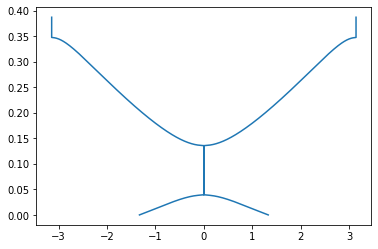

In [10]:
E = np.linspace(0, -0.8*u, 1001)
Ka = solver.get_ks(E, m)

Ka[1:-1][(Ka[0:2]==Ka[1:-1]) * (Ka[1:-1]==Ka[2:])] = None

Ka[-1] = None

plt.plot(np.append(Ka, -Ka), E.reshape(1, -1).repeat(2, axis=0).reshape(-1)/eV)